# Week 5: Advanced Pandas  & basic plotting

In [29]:
!pip install opendatasets
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\namro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\namro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Load Dataset and Inspect

In [30]:
import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/mexwell/smart-home-energy-consumption")

Skipping, found downloaded files in ".\smart-home-energy-consumption" (use force=True to force download)


In [31]:
df = pd.read_csv("smart-home-energy-consumption/smart_home_energy_consumption_large.csv")
df.head()

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5


In [32]:
df.shape

(100000, 8)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Home ID                   100000 non-null  int64  
 1   Appliance Type            100000 non-null  object 
 2   Energy Consumption (kWh)  100000 non-null  float64
 3   Time                      100000 non-null  object 
 4   Date                      100000 non-null  object 
 5   Outdoor Temperature (°C)  100000 non-null  float64
 6   Season                    100000 non-null  object 
 7   Household Size            100000 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [34]:
df.isnull().sum()

Home ID                     0
Appliance Type              0
Energy Consumption (kWh)    0
Time                        0
Date                        0
Outdoor Temperature (°C)    0
Season                      0
Household Size              0
dtype: int64

## Convert Timestamp to DateTime Format

In [35]:
df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

df.dtypes

Home ID                              int64
Appliance Type                      object
Energy Consumption (kWh)           float64
Time                                object
Date                                object
Outdoor Temperature (°C)           float64
Season                              object
Household Size                       int64
Timestamp                   datetime64[ns]
dtype: object

In [36]:
df.head()

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size,Timestamp
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2,2023-12-02 21:12:00
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5,2023-08-06 20:11:00
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3,2023-11-21 06:39:00
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1,2023-01-21 21:56:00
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5,2023-08-26 04:31:00


## Extract Day, Hour from Timestamp

In [37]:
df['day'] = df['Timestamp'].dt.day
df['hour'] = df['Timestamp'].dt.hour
df[['Timestamp', 'day', 'hour']].head(10)

,Timestamp,day,hour
0,2023-12-02 21:12:00,2,21
1,2023-08-06 20:11:00,6,20
2,2023-11-21 06:39:00,21,6
3,2023-01-21 21:56:00,21,21
4,2023-08-26 04:31:00,26,4
5,2023-05-06 11:36:00,6,11
6,2023-06-06 12:05:00,6,12
7,2023-12-12 03:34:00,12,3
8,2023-08-16 15:22:00,16,15
9,2023-09-19 16:32:00,19,16


## Set Timestamp as Index

In [38]:
df = df.set_index('Timestamp')
df.head()

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size,day,hour
Timestamp,,,,,,,,,,
2023-12-02 21:12:00,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2,2,21
2023-08-06 20:11:00,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5,6,20
2023-11-21 06:39:00,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3,21,6
2023-01-21 21:56:00,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1,21,21
2023-08-26 04:31:00,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5,26,4


## Check for Missing Values and Fill

In [39]:
df.isna().sum() # check for missing (NaN = not a Number) values in your DataFrame. NaN represents missing or undefined data in a dataset

Home ID                     0
Appliance Type              0
Energy Consumption (kWh)    0
Time                        0
Date                        0
Outdoor Temperature (°C)    0
Season                      0
Household Size              0
day                         0
hour                        0
dtype: int64

In [40]:
# inject some NaN values
import numpy as np  
nan_indices = np.random.choice(df.index, size=100, replace=False)
df.loc[nan_indices, 'Energy Consumption (kWh)'] = np.nan

In [41]:
df.isnull().sum()

Home ID                       0
Appliance Type                0
Energy Consumption (kWh)    114
Time                          0
Date                          0
Outdoor Temperature (°C)      0
Season                        0
Household Size                0
day                           0
hour                          0
dtype: int64

In [42]:
# locate the NaN values
nan_rows = df[df['Energy Consumption (kWh)'].isnull()] #df[condition]
#use head to see those nan values
nan_rows.head()

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size,day,hour
Timestamp,,,,,,,,,,
2023-08-19 20:12:00,378,Computer,NaN,20:12,2023-08-19,21.5,Summer,3,19,20
2023-12-08 03:29:00,246,Oven,NaN,03:29,2023-12-08,-7.8,Fall,3,8,3
2023-11-10 18:48:00,160,Fridge,NaN,18:48,2023-11-10,-4.5,Fall,1,10,18
2023-01-03 10:46:00,159,Washing Machine,NaN,10:46,2023-01-03,13.0,Winter,4,3,10
2023-04-04 14:43:00,450,Air Conditioning,NaN,14:43,2023-04-04,-3.6,Spring,3,4,14


In [43]:
# fill NaN values with the mean of the column
# This is a simple imputation method    
df['Avg_Energy Consumption (kWh)'] = df['Energy Consumption (kWh)'].fillna(df['Energy Consumption (kWh)'].mean())

In [44]:
df.isnull().sum()

Home ID                           0
Appliance Type                    0
Energy Consumption (kWh)        114
Time                              0
Date                              0
Outdoor Temperature (°C)          0
Season                            0
Household Size                    0
day                               0
hour                              0
Avg_Energy Consumption (kWh)      0
dtype: int64

## Sorting Results

In [56]:
# group by day and hour, then calculate the average energy consumption
grouped = df.groupby(['day', 'hour']).agg({'Avg_Energy Consumption (kWh)': 'mean'}).reset_index()
grouped_sorted = df.sort_values('Avg_Energy Consumption (kWh)', ascending=False)
# the  row iwth home id is 459
# find a specific row with Home ID 459 and Appliance Type "Oven"
# and get the first row of that group   
grouped_sorted = grouped_sorted.reset_index(drop=True)
grouped_sorted.head()
home_id_row = grouped_sorted[(grouped_sorted['Home ID'] == 459) & (grouped_sorted['Appliance Type'] == "Oven")].head(1)
print(home_id_row)



       Home ID Appliance Type  Energy Consumption (kWh)   Time        Date  \
21340      459           Oven                      1.97  03:18  2023-06-29   

       Outdoor Temperature (°C)  Season  Household Size  day  hour  \
21340                      26.1  Spring               1   29     3   

       Avg_Energy Consumption (kWh)  
21340                          1.97  


## Top 3 Appliances by Maximum Energy Consumption

In [46]:
# find the top 3 appliances by average energy consumption
top3 = df.groupby('Appliance Type')['Avg_Energy Consumption (kWh)'].max().nlargest(10)
print(top3)


Appliance Type
Air Conditioning    5.000000
Heater              5.000000
Computer            2.000000
Dishwasher          2.000000
Lights              2.000000
Microwave           2.000000
TV                  2.000000
Oven                2.000000
Washing Machine     2.000000
Fridge              1.499997
Name: Avg_Energy Consumption (kWh), dtype: float64


## Plotting Daily Power Usage (Line Chart)

<Axes: title={'center': 'Top 3 Appliances by Average Energy Consumption'}, xlabel='Appliance Type', ylabel='kWh'>

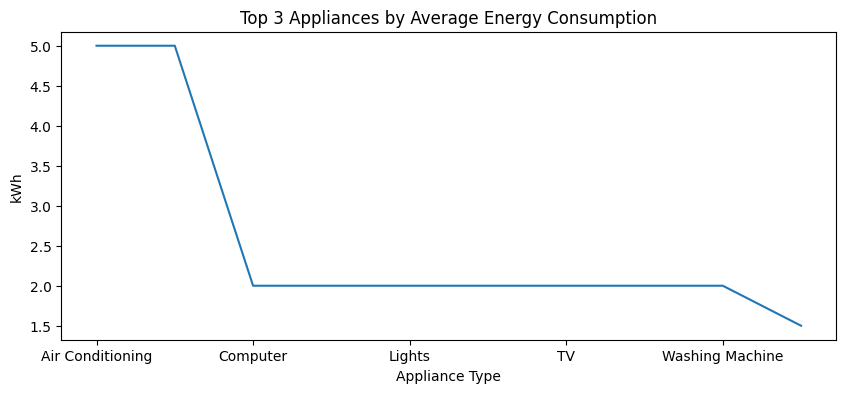

In [57]:
# plot with inbuilt pandas plotting 
# plot the top 3 appliances by average energy consumption
top3.plot(kind='line', title='Top 3 Appliances by Average Energy Consumption', ylabel='kWh', xlabel='Appliance Type', figsize=(10,4))


## Plot Average Power Usage per Appliance (Bar Plot)

<Axes: title={'center': 'Average Energy Consumption by Appliance Type'}, xlabel='Appliance Type', ylabel='kWh'>

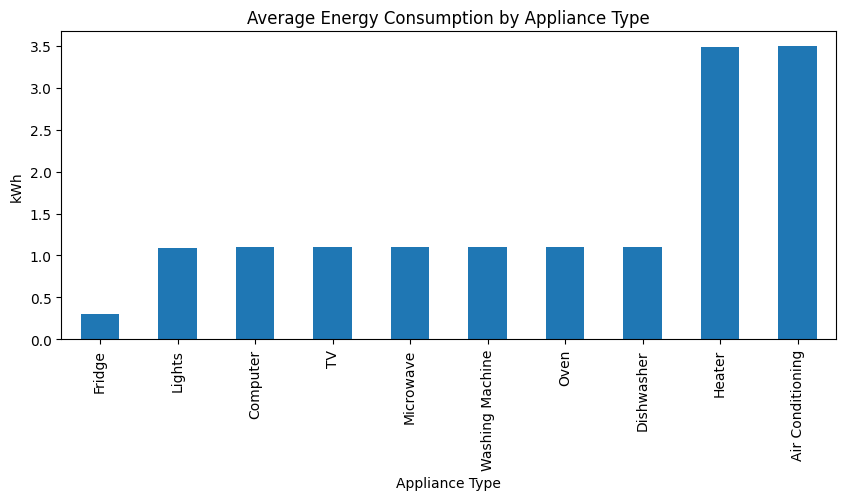

In [48]:
#plot bar chart for energy consumption using group by  for df using appliance type using built-in pandas plotting
df.groupby('Appliance Type')['Avg_Energy Consumption (kWh)'].mean().sort_values().plot(kind='bar', title='Average Energy Consumption by Appliance Type', ylabel='kWh', xlabel='Appliance Type', figsize=(10,4))


## Histogram of Power Usage Distribution

<Axes: title={'center': 'Distribution of Energy Consumption'}, ylabel='Frequency'>

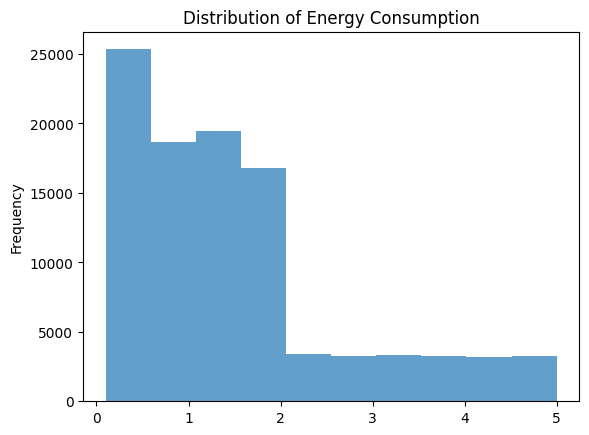

In [49]:

df['Energy Consumption (kWh)'].plot(kind='hist', bins=10, title='Distribution of Energy Consumption', alpha=0.7)



In [ ]:
# resample the data to daily frequency and sum the energy consumption
df_daily = df['Energy Consumption (kWh)'].resample('D').sum() # group the data by day ('D' = daily frequency) based on the timestamp index. (Important: Your df must have the timestamp set as the index using)
df_daily.head()

#output shows total energy consumption per day in kWh

Timestamp
2023-01-01    466.40
2023-01-02    401.01
2023-01-03    371.47
2023-01-04    454.80
2023-01-05    460.98
Freq: D, Name: Energy Consumption (kWh), dtype: float64

## Handling Missing energy consumption

In [51]:
df['Energy Consumption (kWh)'] = df['Energy Consumption (kWh)'].fillna(df['Energy Consumption (kWh)'].mean())

## GroupBy  – Aggregations

In [52]:
#Custom Aggregation with user defined function
def custom_aggregation(series):
    return  series.max() - series.min() + series.mean() # This is a custom aggregation function that calculates the range plus the mean

grouped_custom = df.groupby(['Season', 'Appliance Type']).agg(
    avg_power=('Energy Consumption (kWh)', 'mean'),
    custom_metric=('Energy Consumption (kWh)', custom_aggregation),
    min_power=('Energy Consumption (kWh)', 'min'),
    max_power=('Energy Consumption (kWh)', 'max'),
    count_entries=('Energy Consumption (kWh)', 'count')
).reset_index()

grouped_custom.head()


,Season,Appliance Type,avg_power,custom_metric,min_power,max_power,count_entries
0,Fall,Air Conditioning,3.463467,6.963470,1.499997,5.000000,2547
1,Fall,Computer,1.099524,2.899524,0.200000,2.000000,2523
2,Fall,Dishwasher,1.106070,2.906070,0.200000,2.000000,2565
3,Fall,Fridge,0.301041,1.701038,0.100000,1.499997,2489
4,Fall,Heater,3.475570,6.975573,1.499997,5.000000,2499


<Axes: title={'center': 'Custom Aggregation of Energy Consumption by Appliance Type'}, xlabel='Appliance Type', ylabel='Proportion of Values > 3.0'>

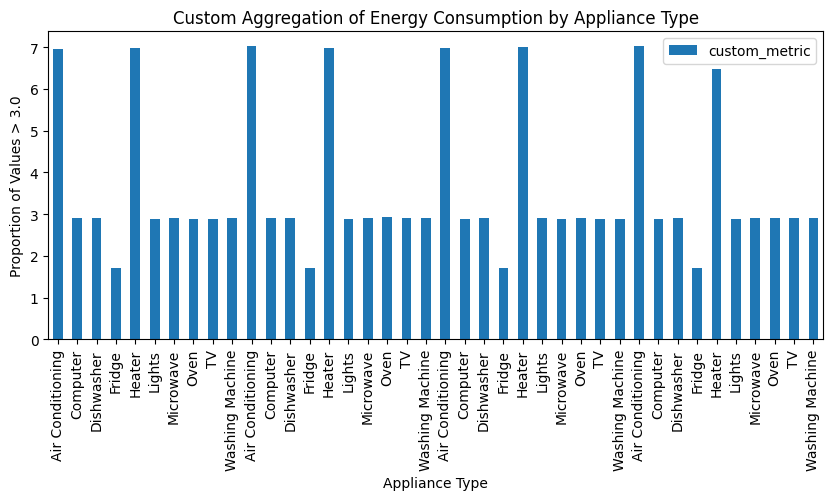

In [53]:
# plot grouped_custom data using built-in pandas plotting which shows the custom aggregation of energy consumption by appliance type
grouped_custom.plot(kind='bar', x='Appliance Type', y='custom_metric', title='Custom Aggregation of Energy Consumption by Appliance Type', ylabel='Proportion of Values > 3.0', xlabel='Appliance Type', figsize=(10,4))


C:\Users\namro\AppData\Local\Temp\ipykernel_10036\2097442275.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df['Energy Consumption (kWh)'].resample('H').sum()


<Axes: title={'center': 'Hourly Energy Consumption'}, xlabel='Timestamp', ylabel='kWh'>

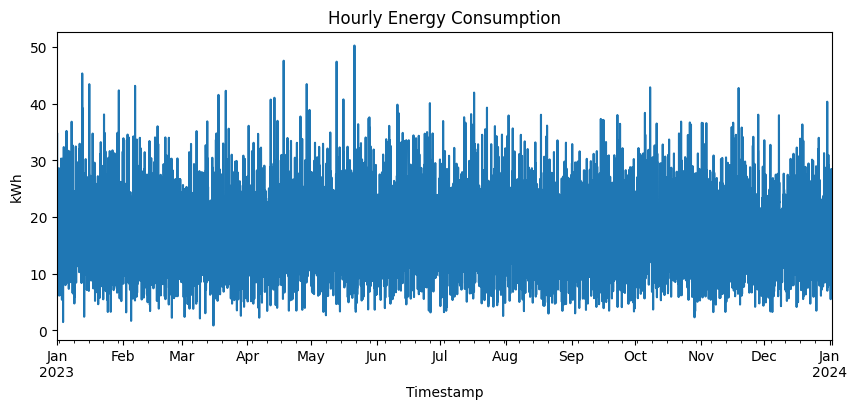

In [54]:
## Resample Energy Consumption Data
# Resample the data to hourly frequency and sum the energy consumption
df_hourly = df['Energy Consumption (kWh)'].resample('H').sum()
df_hourly.head()
# Plot the hourly energy consumption
df_hourly.plot(kind='line', title='Hourly Energy Consumption', ylabel='kWh', xlabel='Timestamp', figsize=(10,4))



C:\Users\namro\AppData\Local\Temp\ipykernel_10036\799110975.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Energy Consumption (kWh)'].resample('M').sum()


<Axes: title={'center': 'Monthly Energy Consumption'}, xlabel='Timestamp', ylabel='kWh'>

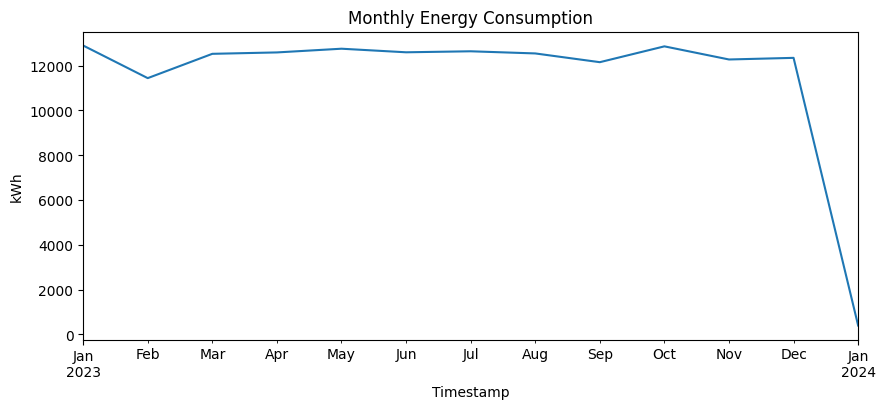

In [55]:
# Resample the data to monthly frequency and sum the energy consumption
df_monthly = df['Energy Consumption (kWh)'].resample('M').sum()
df_monthly.head()
# Plot the monthly energy consumption
df_monthly.plot(kind='line', title='Monthly Energy Consumption', ylabel='kWh', xlabel='Timestamp', figsize=(10,4))

# Home Assignment


Create a database named ``sensor_data.db.`` Define a table called measurements with the following columns:

``id``: INTEGER PRIMARY KEY   , ``timestamp``: TEXT (ISO 8601 format, e.g., "2025-06-05 14:27:00")   , ``value``: REAL (e.g., a temperature or power reading)


-Generate at least 200 rows of synthetic sensor data.

-Timestamps should span at least two full days with uneven/random intervals (e.g., random minutes).

-Values can be random floats between 0.0 and 100.0.

-Insert this data into the measurements table.

-Load the entire measurements table into a Pandas DataFrame. Ensure the timestamp column is parsed as a datetime and set as the index.

-Resample the DataFrame to hourly frequency and compute the average of value for each hour.

-Filter to keep only rows where the hourly average is greater than 50.0.

-Group the filtered hourly data by date (e.g., using .dt.date) and compute:

  1. The daily maximum of the hourly averages.
  2. The count of hours that passed the filter.


-Plot the daily maximum values using Pandas .plot(). (Include axis labels and a title for clarity.)
